
# SNCF TRAFFIC ANALYSIS OVER THE YEARS 2018 - 2023

In [13]:
import pandas as pd
import duckdb            #normal query inside pandas, extension: duckdb.query()
#import pandasql as ps    #similar to duckdb, makes you query direct into pandas, extension:    ps.sqldf()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pandasgui
from warnings import filterwarnings
filterwarnings("ignore")


#### Import dataset

In [14]:
data=pd.read_csv("Dataset_national_trains.csv", sep=";")

display(data.head(5))

,year,month,service,depart_st,arrival_st,avg_duration,exp_monthly_trains,cancelled_nb,delay>15,delay>30,delay>60,delay_external,delay_infrastructure,delay_traffic_management,delay_rolling_stock,delay_station_management,delay_passenger_related
0,2018,Jan,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,110,44,8,36.13,31.09,10.92,15.97,5.04,0.84
1,2018,Jan,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,22,5,0,15.38,30.77,38.46,11.54,3.85,0.00
2,2018,Jan,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,26,17,7,26.92,38.46,15.38,19.23,0.00,0.00
3,2018,Jan,National,PARIS MONTPARNASSE,ST MALO,156,102,0,8,6,4,23.08,46.15,7.69,15.38,7.69,0.00
4,2018,Jan,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,17,6,0,21.21,42.42,9.09,21.21,6.06,0.00


####  Sorting France national service only

In [25]:
national_data = data[(data['service'] == 'National')]  # filter for year 2023

display(national_data.tail(5))    #use display instead of print to get a nice table view!"""

,year,month,service,depart_st,arrival_st,avg_duration,exp_monthly_trains,cancelled_nb,delay>15,delay>30,delay>60,delay_external,delay_infrastructure,delay_traffic_management,delay_rolling_stock,delay_station_management,delay_passenger_related
8869,2023,Dec,National,PARIS MONTPARNASSE,BREST,230,276,2,29,9,3,37.93,3.45,10.34,20.69,17.24,10.34
8870,2023,Dec,National,PARIS MONTPARNASSE,TOULOUSE MATABIAU,264,219,4,43,28,10,46.51,9.30,13.95,11.63,4.65,13.95
8871,2023,Dec,National,PARIS NORD,DOUAI,71,136,0,11,2,1,10.53,5.26,15.79,47.37,15.79,5.26
8872,2023,Dec,National,STRASBOURG,NANTES,337,61,0,9,6,1,25.00,12.50,0.00,37.50,25.00,0.00
8873,2023,Dec,National,TOURS,PARIS MONTPARNASSE,74,188,3,4,2,1,13.33,26.67,40.00,13.33,0.00,6.67


#### Check the most trafficked line over the years

In [39]:
#here check the most trafficked lines during the years, 
#remove years to see the line for overall most traffic, use year to see accoridng to each year = does paris bordeaux have always been the most trafficked line?


most_trafficked_route = duckdb.query(
  """SELECT 
    depart_st,
    arrival_st,
    ROUND(AVG(exp_monthly_trains)) AS avg_trains_per_month,
    year
FROM national_data
GROUP BY depart_st, arrival_st, year
ORDER BY avg_trains_per_month DESC, year DESC
LIMIT 30"""
).show()

┌────────────────────┬────────────────────┬──────────────────────┬───────┐
│     depart_st      │     arrival_st     │ avg_trains_per_month │ year  │
│      varchar       │      varchar       │        double        │ int64 │
├────────────────────┼────────────────────┼──────────────────────┼───────┤
│ BORDEAUX ST JEAN   │ PARIS MONTPARNASSE │               1036.0 │  2023 │
│ PARIS MONTPARNASSE │ BORDEAUX ST JEAN   │               1001.0 │  2023 │
│ BORDEAUX ST JEAN   │ PARIS MONTPARNASSE │                978.0 │  2022 │
│ PARIS MONTPARNASSE │ BORDEAUX ST JEAN   │                974.0 │  2022 │
│ BORDEAUX ST JEAN   │ PARIS MONTPARNASSE │                836.0 │  2021 │
│ PARIS MONTPARNASSE │ BORDEAUX ST JEAN   │                833.0 │  2021 │
│ BORDEAUX ST JEAN   │ PARIS MONTPARNASSE │                824.0 │  2018 │
│ RENNES             │ PARIS MONTPARNASSE │                820.0 │  2022 │
│ BORDEAUX ST JEAN   │ PARIS MONTPARNASSE │                807.0 │  2019 │
│ PARIS MONTPARNASSE │ RE

#### ...and the least trafficked routes

In [40]:
# routes with less traffic: 

least_trafficked_route = duckdb.query(
  """SELECT 
    depart_st,
    arrival_st,
    ROUND(AVG(exp_monthly_trains)) AS avg_trains_per_month,
    year
FROM national_data
GROUP BY depart_st, arrival_st, year
ORDER BY avg_trains_per_month ASC, year DESC
LIMIT 30"""
).show()

┌──────────────────────┬──────────────────────┬──────────────────────┬───────┐
│      depart_st       │      arrival_st      │ avg_trains_per_month │ year  │
│       varchar        │       varchar        │        double        │ int64 │
├──────────────────────┼──────────────────────┼──────────────────────┼───────┤
│ TOURCOING            │ MARSEILLE ST CHARLES │                  2.0 │  2022 │
│ TOURCOING            │ BORDEAUX ST JEAN     │                 17.0 │  2020 │
│ BORDEAUX ST JEAN     │ TOURCOING            │                 18.0 │  2020 │
│ MARSEILLE ST CHARLES │ TOURCOING            │                 18.0 │  2019 │
│ MARSEILLE ST CHARLES │ TOURCOING            │                 19.0 │  2020 │
│ BORDEAUX ST JEAN     │ TOURCOING            │                 20.0 │  2019 │
│ TOURCOING            │ BORDEAUX ST JEAN     │                 23.0 │  2019 │
│ TOURCOING            │ MARSEILLE ST CHARLES │                 25.0 │  2018 │
│ STRASBOURG           │ NANTES               │     

#### Picking the most trafficked line: Paris to Bordeaux and viceversa, up to 1000+ trains/months

In [19]:
Service_PRS_BDX = duckdb.query(
  """
    SELECT depart_st, arrival_st, exp_monthly_trains, year, month
    FROM national_data
    WHERE depart_st = 'PARIS MONTPARNASSE' AND arrival_st = 'BORDEAUX ST JEAN' OR depart_st='BORDEAUX ST JEAN' AND arrival_st = 'PARIS MONTPARNASSE'
    ORDER BY exp_monthly_trains DESC
""").show()

┌────────────────────┬────────────────────┬────────────────────┬───────┬─────────┐
│     depart_st      │     arrival_st     │ exp_monthly_trains │ year  │  month  │
│      varchar       │      varchar       │       int64        │ int64 │ varchar │
├────────────────────┼────────────────────┼────────────────────┼───────┼─────────┤
│ BORDEAUX ST JEAN   │ PARIS MONTPARNASSE │               1100 │  2023 │ Oct     │
│ BORDEAUX ST JEAN   │ PARIS MONTPARNASSE │               1084 │  2023 │ Dec     │
│ BORDEAUX ST JEAN   │ PARIS MONTPARNASSE │               1075 │  2023 │ Jan     │
│ BORDEAUX ST JEAN   │ PARIS MONTPARNASSE │               1066 │  2023 │ Mar     │
│ BORDEAUX ST JEAN   │ PARIS MONTPARNASSE │               1061 │  2023 │ Sep     │
│ PARIS MONTPARNASSE │ BORDEAUX ST JEAN   │               1054 │  2023 │ Oct     │
│ BORDEAUX ST JEAN   │ PARIS MONTPARNASSE │               1052 │  2023 │ Jun     │
│ BORDEAUX ST JEAN   │ PARIS MONTPARNASSE │               1051 │  2022 │ Dec     │
│ PA

### Covid impact on the most trafficked line - graph over rain traffic PARIS Montparnasse and BORDEAUX ST Jean 2018 - 2023

,depart_st,arrival_st,exp_monthly_trains,year,month
0,PARIS MONTPARNASSE,BORDEAUX ST JEAN,775,2018,Jan
1,PARIS MONTPARNASSE,BORDEAUX ST JEAN,698,2018,Feb
2,PARIS MONTPARNASSE,BORDEAUX ST JEAN,760,2018,Mar
3,PARIS MONTPARNASSE,BORDEAUX ST JEAN,756,2018,Apr
4,PARIS MONTPARNASSE,BORDEAUX ST JEAN,800,2018,May
...,...,...,...,...,...
67,PARIS MONTPARNASSE,BORDEAUX ST JEAN,976,2023,Aug
68,PARIS MONTPARNASSE,BORDEAUX ST JEAN,1014,2023,Sep
69,PARIS MONTPARNASSE,BORDEAUX ST JEAN,1054,2023,Oct
70,PARIS MONTPARNASSE,BORDEAUX ST JEAN,1024,2023,Nov


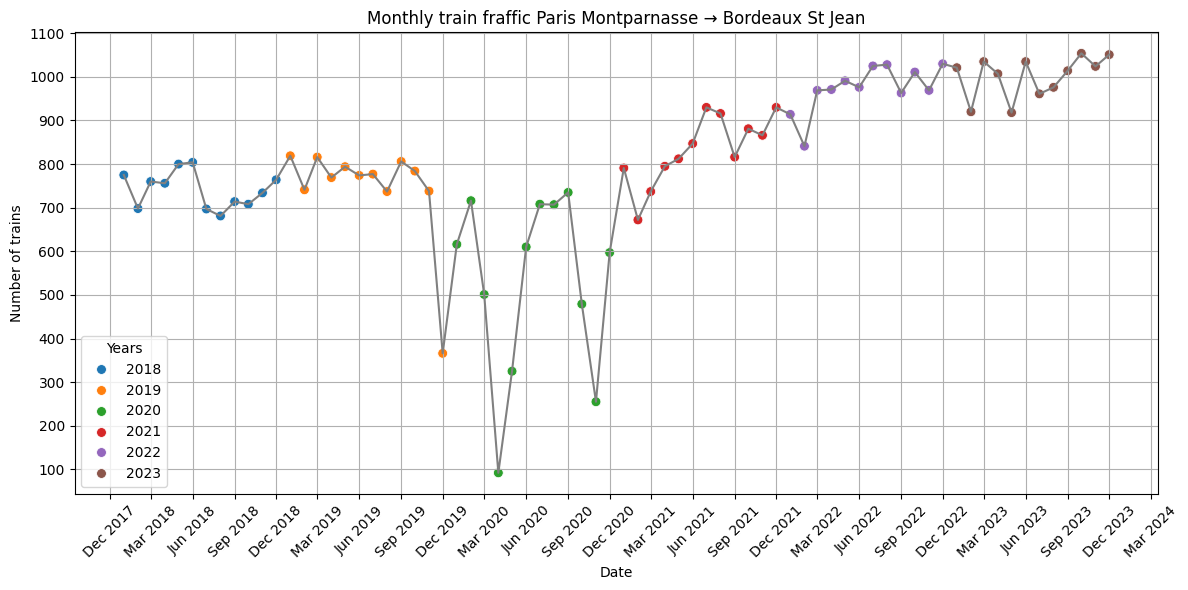

In [20]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
data_graph = duckdb.query(
	"""
	SELECT depart_st, arrival_st, exp_monthly_trains, year, month
	FROM national_data
	WHERE depart_st = 'PARIS MONTPARNASSE' AND arrival_st = 'BORDEAUX ST JEAN'
	"""
).to_df()    #need to create a dataframe from this query to be used

display(data_graph)

month_numbers = {                                          #used to convert months to numeric values to be use in a plot
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
data_graph['month_num'] = data_graph['month'].map(month_numbers)      #assigns each value to another value
data_graph['date'] = pd.to_datetime(pd.DataFrame({
    'year': data_graph['year'],
    'month': data_graph['month_num'],
    'day': 1
}))
df = data_graph.sort_values('date')

# Plot with Seaborn
df['Years'] = df['year'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='exp_monthly_trains', color='grey')
sns.scatterplot(data=df, x='date', y='exp_monthly_trains', marker='o', hue='Years', palette='tab10', s=50)
plt.title("Monthly train fraffic Paris Montparnasse → Bordeaux St Jean")
plt.xlabel("Date")
plt.ylabel("Number of trains")
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


,depart_st,arrival_st,exp_monthly_trains,year,month
0,BORDEAUX ST JEAN,PARIS MONTPARNASSE,870,2018,Jan
1,BORDEAUX ST JEAN,PARIS MONTPARNASSE,824,2018,Feb
2,BORDEAUX ST JEAN,PARIS MONTPARNASSE,878,2018,Mar
3,BORDEAUX ST JEAN,PARIS MONTPARNASSE,841,2018,Apr
4,BORDEAUX ST JEAN,PARIS MONTPARNASSE,844,2018,May
...,...,...,...,...,...
67,BORDEAUX ST JEAN,PARIS MONTPARNASSE,1015,2023,Aug
68,BORDEAUX ST JEAN,PARIS MONTPARNASSE,1061,2023,Sep
69,BORDEAUX ST JEAN,PARIS MONTPARNASSE,1100,2023,Oct
70,BORDEAUX ST JEAN,PARIS MONTPARNASSE,1042,2023,Nov


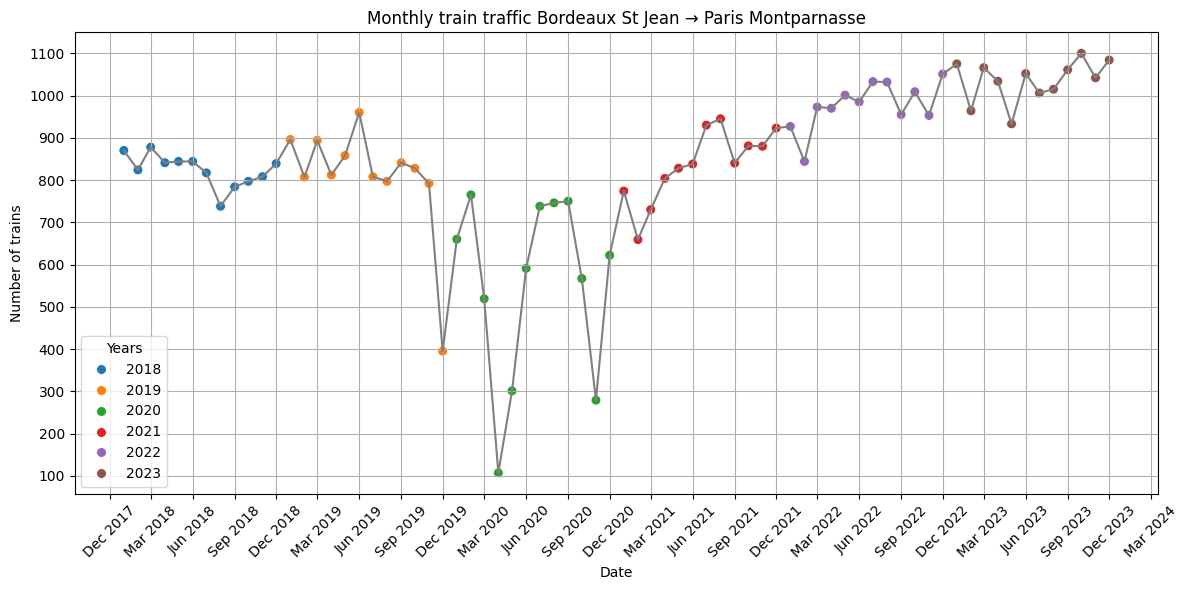

In [21]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
data_graph_2 = duckdb.query(
	"""
	SELECT depart_st, arrival_st, exp_monthly_trains, year, month
	FROM national_data
	WHERE depart_st = 'BORDEAUX ST JEAN' AND arrival_st = 'PARIS MONTPARNASSE'
	"""
).to_df()    #need to create a dataframe from this query to be used

display(data_graph_2)

month_numbers = {                                          #used to convert months to numeric values to be use in a plot
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
data_graph_2['month_num'] = data_graph_2['month'].map(month_numbers)      #assigns each value to another value
data_graph_2['date'] = pd.to_datetime(pd.DataFrame({
    'year': data_graph_2['year'],
    'month': data_graph_2['month_num'],
    'day': 1
}))
df_2 = data_graph_2.sort_values('date')

# Plot with Seaborn
df_2['Years'] = df_2['year'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(data=df_2, x='date', y='exp_monthly_trains', color='grey')
sns.scatterplot(data=df_2, x='date', y='exp_monthly_trains', marker='o', hue='Years', palette='tab10', s=50)
plt.title("Monthly train traffic Bordeaux St Jean → Paris Montparnasse")
plt.xlabel("Date")
plt.ylabel("Number of trains")
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()